In [1]:
# Import libraries and dataset

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(20,10)
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
#model testing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



In [2]:
notebook_path = os.path.abspath("Notebook.ipynb")
dengAI_features_path="/Users/nataliecarlson/Desktop/MachineLearning/A3/Carlson/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv"
df = pd.read_csv(dengAI_features_path)
dengAI_labels_path="/Users/nataliecarlson/Desktop/MachineLearning/A3/Carlson/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv"
y = pd.read_csv(dengAI_labels_path)

In [3]:

# Merge data frames


In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
y.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [6]:
#add output of y to main data frame
df['total_cases']=y['total_cases']
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [7]:
#view feature data types
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [8]:
#Convert city data type to catergory
df.city = pd.Categorical(df.city)
#Convert category to int code
df['city']=df.city.cat.codes

In [9]:
#remove "week_start_date" (redundant to "year" and "weekofyear" and in string format)
df=df.drop(['week_start_date'],axis=1) #drop

In [10]:

# Assess and manipulate null values
 

In [11]:
# #remove completely empty records
df.dropna(how = 'all')
# #remove records with no output 
df = df[df['total_cases'].notna()]

In [12]:
#view count of empty cells by column
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [13]:
#view general statistics
df.describe()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,0.642857,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,0.479322,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,1.000000,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,1.000000,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [14]:
#fill missing values with data from data in row above (the week before)
# Note: Week one is fully filled for each city, i.e. there is a starting baseline for both cities
df = df.ffill(axis = 0)

In [15]:
#view updated count of empty cells by column
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

In [16]:
#view updated general statistics and visually compare to prior
df.describe()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.642857,2001.031593,26.503434,0.131271,0.128068,0.202606,0.201987,45.686937,298.697965,299.221483,295.245445,303.419505,295.719712,40.111635,82.176203,45.686937,16.745565,4.898656,27.180313,8.085646,32.443338,22.099863,39.194162,24.675137
std,0.479322,5.408314,15.019437,0.138527,0.119561,0.074409,0.083592,43.779318,1.361950,1.262676,1.527527,3.233030,2.559398,43.329174,7.161016,43.779318,1.542276,3.542340,1.280861,2.122836,1.960769,1.569113,47.363305,43.596000
min,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,0.039100,0.048250,0.152795,0.144455,9.655000,297.654643,298.257143,294.119643,301.000000,293.900000,13.085000,77.185714,9.655000,15.560000,2.328571,26.300000,6.528571,31.100000,21.100000,8.700000,5.000000
50%,1.000000,2002.000000,26.500000,0.113900,0.115926,0.195664,0.190121,38.235000,298.646429,299.285714,295.639286,302.400000,296.200000,27.245000,80.301429,38.235000,17.087143,2.857143,27.400000,7.364286,32.800000,22.200000,23.800000,12.000000
75%,1.000000,2005.000000,39.250000,0.232018,0.213429,0.247461,0.246775,70.227500,299.827500,300.207143,296.460000,305.500000,297.900000,52.200000,86.406429,70.227500,17.977500,7.617857,28.132143,9.600000,33.900000,23.300000,53.675000,28.000000
max,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [17]:

#Visulaize the data


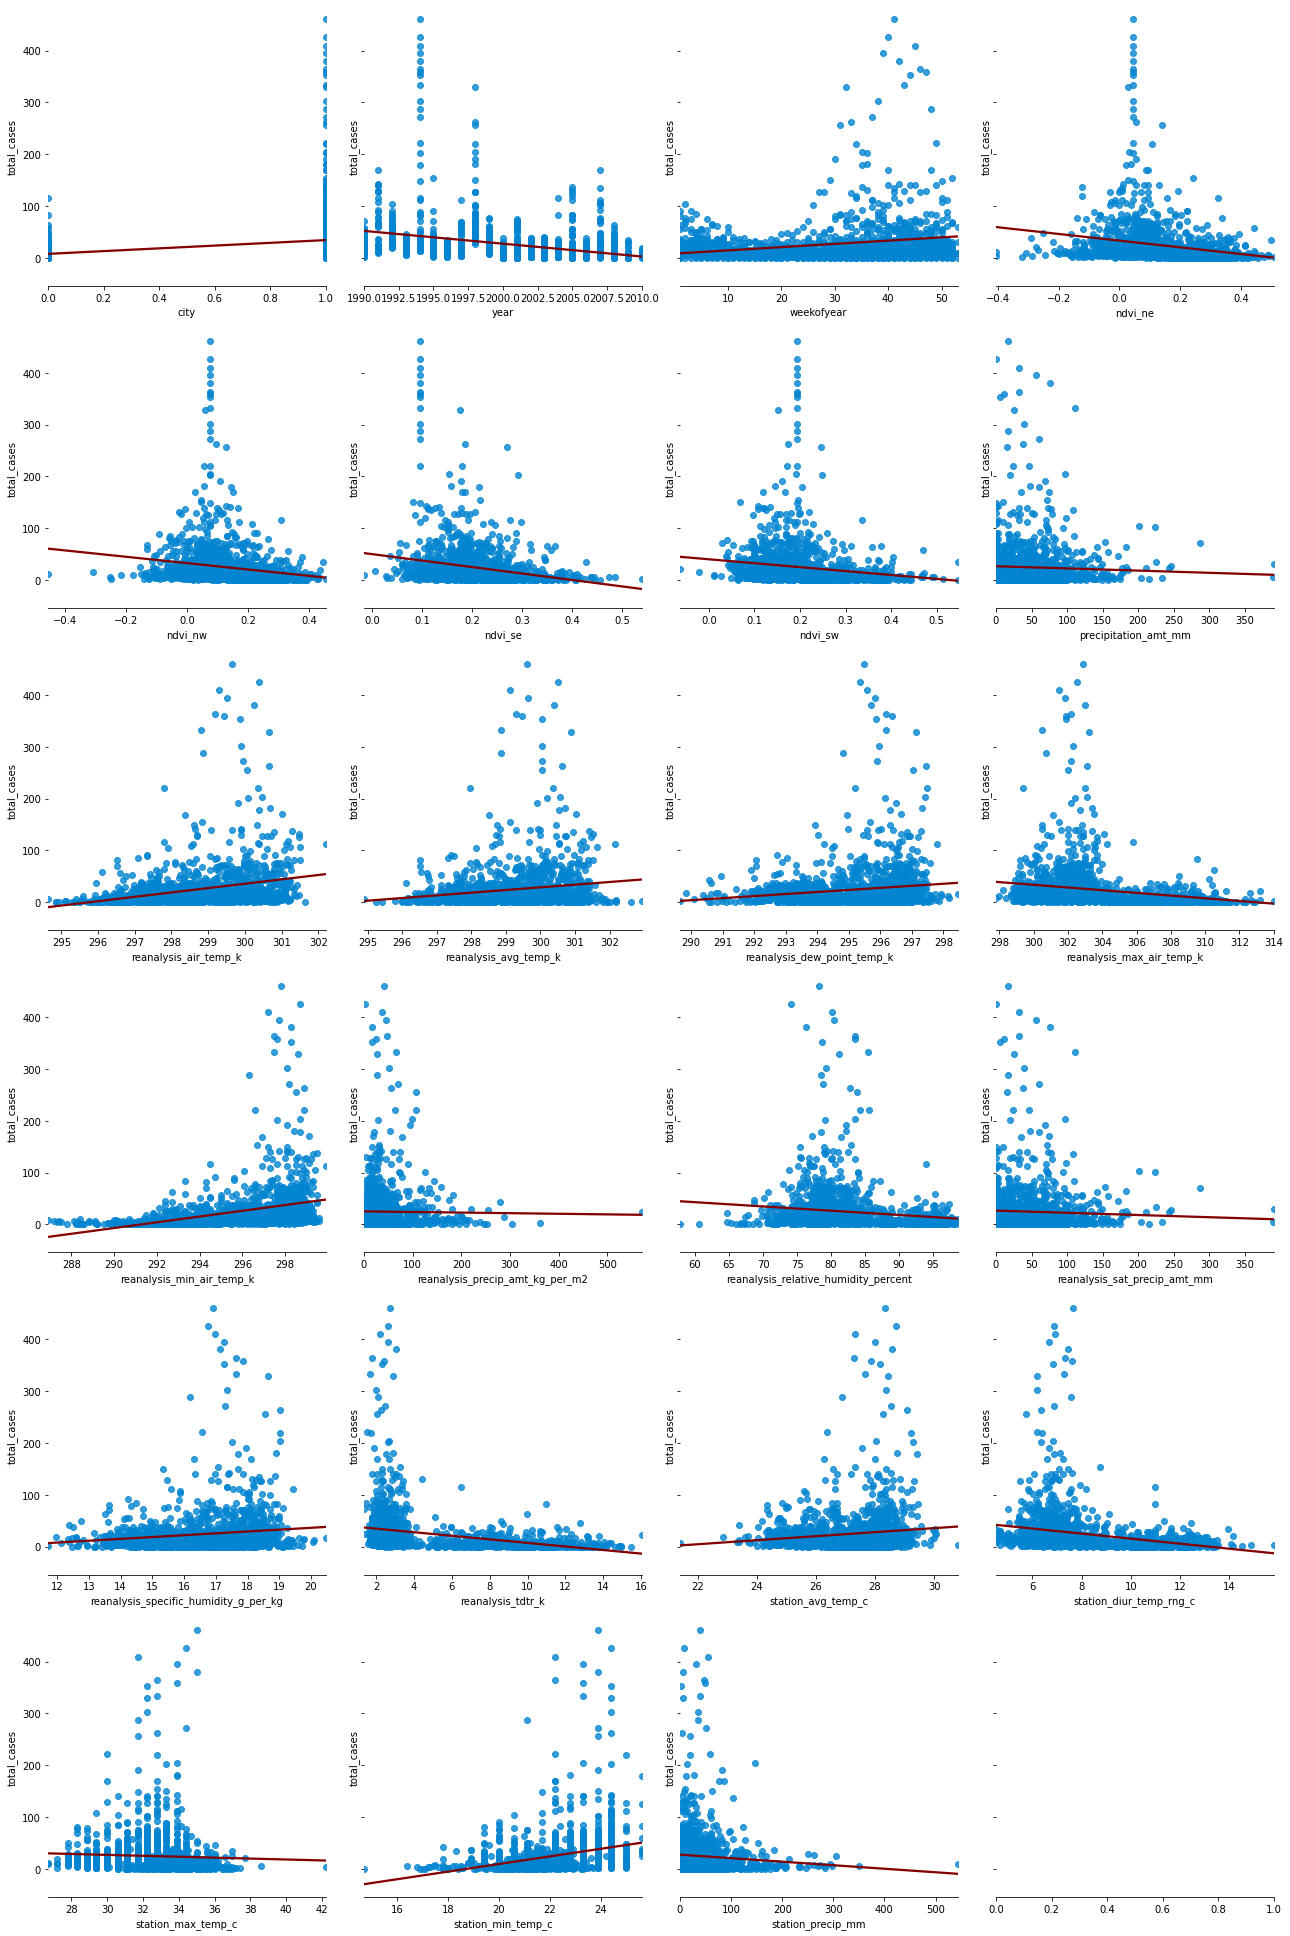

In [18]:
# View linear regression of total cases per attribute

xvlist = list(df.drop(['total_cases'],axis=1)) 

fcol = 4 # limit four graphs per row for easy visualization
frow = int(np.ceil(len(xvlist)/fcol)) # number of rows in your subplot
fhgt = frow*4.5 # height

# Set up the matplotlib figure
f, axes = plt.subplots(frow, fcol, figsize=(18, fhgt), sharey=True) 
sns.despine(left=True)

# make a list of items to iterate over to produce graph
axes_list = [item for sublist in axes for item in sublist]

for k, xvar in enumerate(xvlist):
    
    sns.regplot(
        x=xvar, 
        y='total_cases', 
        data=df, 
        ax=axes_list[k],
        ci = None, # set the confidence interval to none, so no resampling
        logx=False,
        scatter_kws={'color': 'xkcd:cerulean'}, # using xkcd color codes, https://xkcd.com/color/rgb/
        line_kws={'color': '#840000'} # using hex color codes
    )

plt.tight_layout()



In [19]:
#View columns with extreme outliers
#Note: first array == row, second array == column
#column name                          number
# city                                     1
# year                                     2
# weekofyear                               3
# ndvi_ne                                  4
# ndvi_nw                                  5
# ndvi_se                                  6
# ndvi_sw                                  7
# precipitation_amt_mm                     8
# reanalysis_air_temp_k                    9
# reanalysis_avg_temp_k                    10
# reanalysis_dew_point_temp_k              11
# reanalysis_max_air_temp_k                12
# reanalysis_min_air_temp_k                13
# reanalysis_precip_amt_kg_per_m2          14
# reanalysis_relative_humidity_percent     15
# reanalysis_sat_precip_amt_mm             16
# reanalysis_specific_humidity_g_per_kg    17
# reanalysis_tdtr_k                        18
# station_avg_temp_c                       19
# station_diur_temp_rng_c                  20
# station_max_temp_c                       21
# station_min_temp_c                       22
# station_precip_mm                        23
# total_cases                              24

z = np.abs(stats.zscore(df))
print(np.where(z>5))

(array([  24,  107,  228,  229,  230,  231,  232,  233,  234,  235,  236,
        237,  238,  239,  332,  429,  430,  431,  600,  600,  675,  675,
        705,  705,  974, 1033, 1077, 1112, 1138, 1177, 1321, 1338, 1438]), array([13, 13, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 23, 23,
       23,  7, 15,  7, 15,  7, 15, 13, 22, 13, 22, 22, 22, 22, 22, 13]))


In [20]:
#outlier counts by column number
oc = pd.DataFrame({'col': [13, 13, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 23, 23,
       23,  7, 15,  7, 15,  7, 15, 13, 22, 13, 22, 22, 22, 22, 22, 13]})
#frequency count
count = oc['col'].value_counts()
print(count)

23    15
22     7
13     5
15     3
7      3
Name: col, dtype: int64


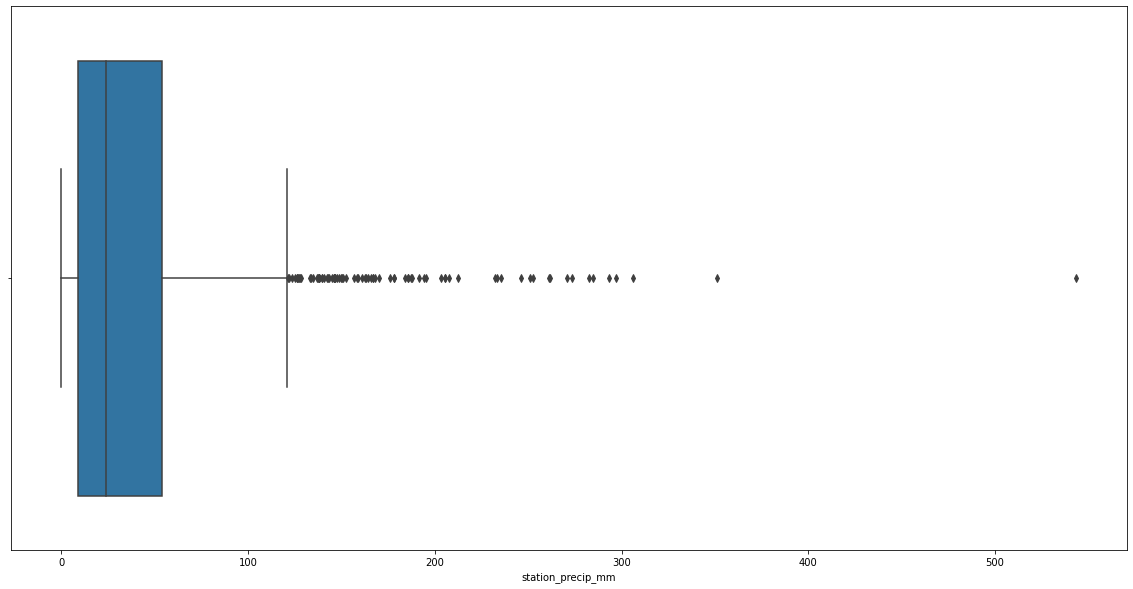

In [21]:
sns.boxplot(x=df['station_precip_mm']) #column 23

In [22]:
# Get outlier record numbers
station_precip_mm_outliers = df[ df['station_precip_mm'] > 300 ].index
station_precip_mm_outliers

Int64Index([332, 1033, 1177], dtype='int64')

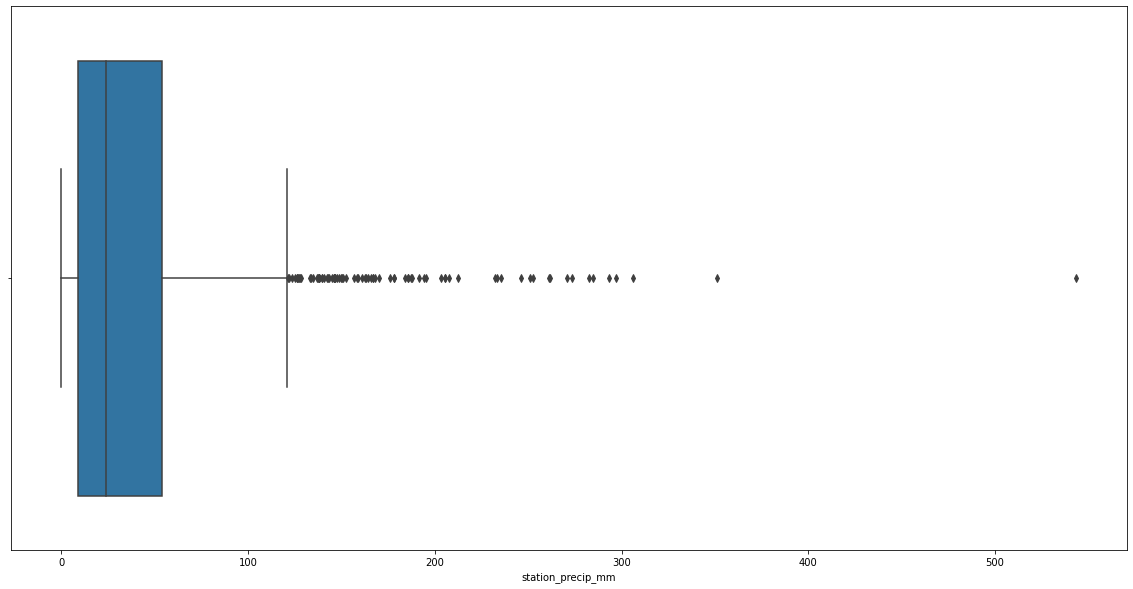

In [23]:
sns.boxplot(x=df['station_precip_mm']) #column 22

In [24]:
# Get outlier record numbers
station_min_temp_c_outliers = df[ df['station_min_temp_c'] < 17 ].index
station_min_temp_c_outliers

Int64Index([939, 1103, 1208, 1304], dtype='int64')

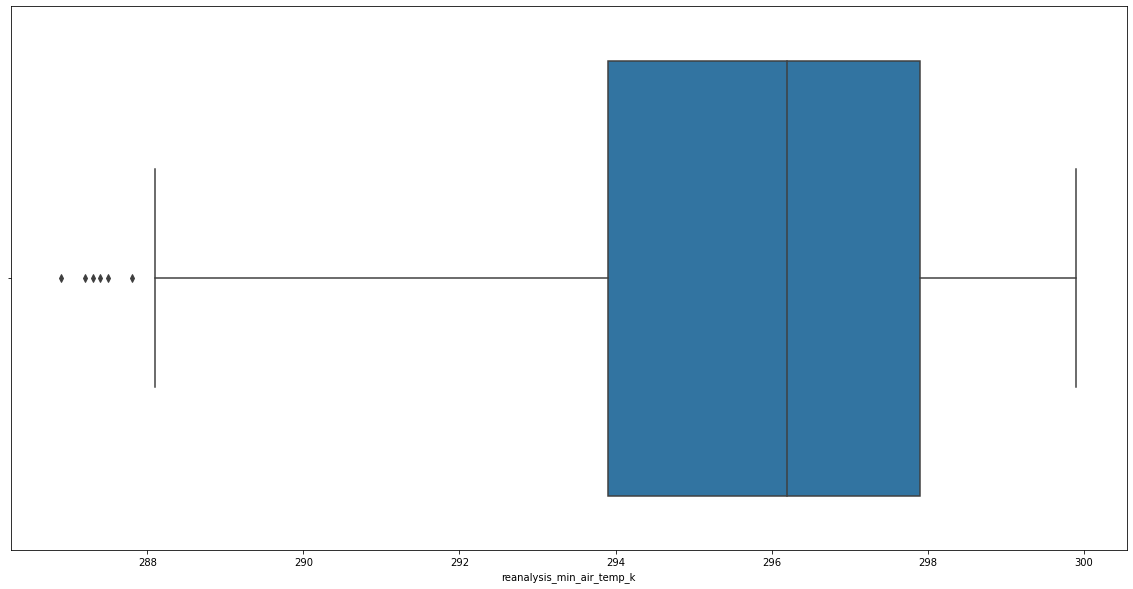

In [25]:
sns.boxplot(x=df['reanalysis_min_air_temp_k']) #column 13

In [26]:
# Get outlier record numbers
reanalysis_min_air_temp_k_outliers = df[ df['reanalysis_min_air_temp_k'] < 288 ].index
reanalysis_min_air_temp_k_outliers

Int64Index([1040, 1094, 1199, 1242, 1295, 1355], dtype='int64')

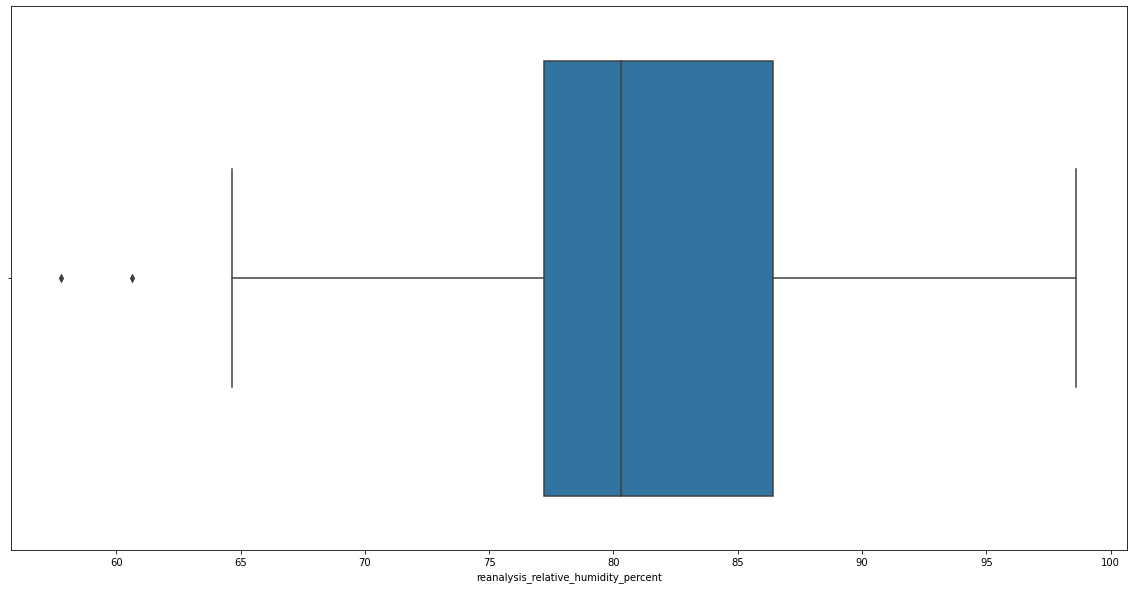

In [27]:
sns.boxplot(x=df['reanalysis_relative_humidity_percent']) #column 15

In [28]:
# Get outlier record numbers
reanalysis_relative_humidity_percent_outliers = df[ df['reanalysis_relative_humidity_percent'] < 65 ].index
reanalysis_relative_humidity_percent_outliers

Int64Index([946, 961, 1051, 1203], dtype='int64')

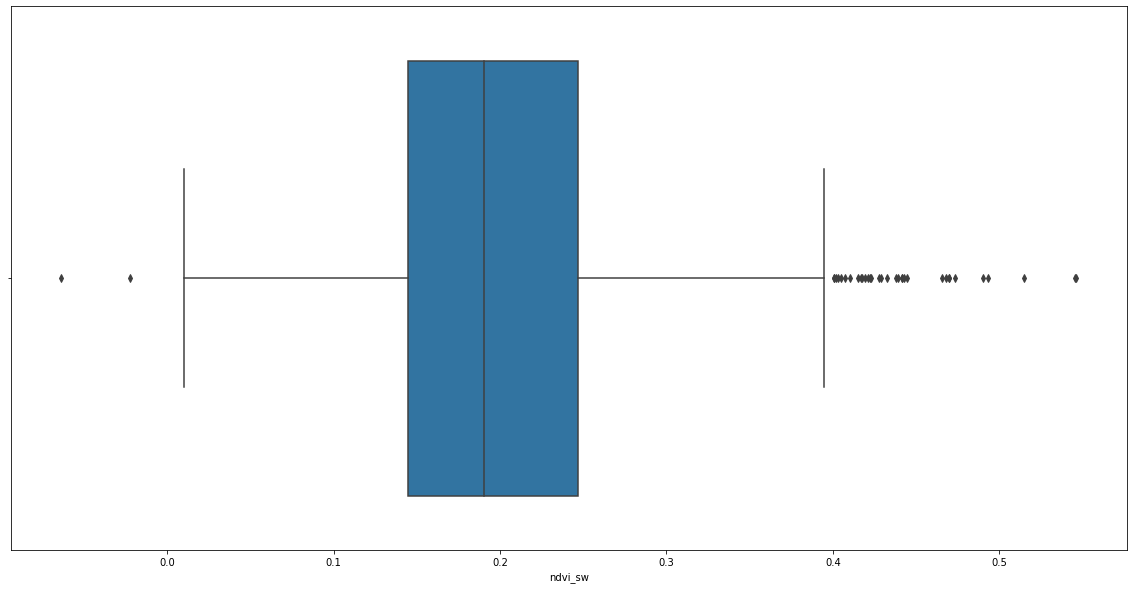

In [29]:
sns.boxplot(x=df['ndvi_sw']) #column 7

In [30]:
# Get outlier record numbers
reanalysis_min_air_temp_k_outliers = df[ df['ndvi_sw'] > 0.5 ].index
reanalysis_min_air_temp_k_outliers

Int64Index([1002, 1370, 1413], dtype='int64')

In [31]:
#view records with feature extreme outliers

#record num   feature with outlier
# 332:        station_precip_mm
# 939:        station_min_temp_c
# 946:        reanalysis_relative_humidity_percent
# 961:        reanalysis_relative_humidity_percent
# 1002:       ndvi_sw
# 1033:       station_precip_mm
# 1040:       reanalysis_min_air_temp_k
# 1051:       reanalysis_relative_humidity_percent
# 1094:       reanalysis_min_air_temp_k
# 1103:       station_min_temp_c
# 1177:       station_precip_mm
# 1199:       reanalysis_min_air_temp_k
# 1203:       reanalysis_relative_humidity_percent
# 1208:       station_min_temp_c    
# 1242:       reanalysis_min_air_temp_k
# 1295:       reanalysis_min_air_temp_k
# 1304:       station_min_temp_c
# 1355:       reanalysis_min_air_temp_k    
# 1370:       ndvi_sw
# 1413:       ndvi_sw   
df.loc[[332,939,946,961,1002,1033,1040,1051,1094,1103,1177,1199,1203,1208,1242,1295,1304,1355,1370,1413]]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
332,1,1996,38,0.104300,0.028450,0.150429,0.107817,243.55,299.482857,299.442857,296.880000,301.3,297.6,151.70,85.690000,243.55,18.407143,1.828571,27.042857,5.828571,31.7,22.8,305.9,24
939,0,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
946,0,2000,36,0.295586,0.295683,0.312214,0.265929,23.12,300.802857,301.935714,290.635714,312.8,291.5,2.50,57.787143,23.12,12.652857,14.900000,28.366667,12.900000,35.8,21.7,56.9,1
961,0,2000,51,0.265014,0.169057,0.234867,0.302243,3.90,300.411429,302.000000,291.092857,311.2,294.6,5.70,60.641429,3.90,13.188571,13.000000,28.200000,12.283333,35.0,21.0,0.0,0
1002,0,2001,41,0.420286,0.381957,0.443800,0.546017,58.75,299.158571,300.285714,293.812857,312.3,290.8,12.30,74.418571,58.75,15.327143,11.342857,28.525000,12.475000,36.8,21.8,30.9,0
1033,0,2002,20,0.133800,0.109633,0.219614,0.141700,46.79,296.784286,297.585714,296.221429,303.7,293.9,93.40,97.242857,46.79,17.744286,5.085714,26.866667,9.700000,32.3,20.8,543.3,10
1040,0,2002,27,0.101543,0.126600,0.119357,0.076243,3.27,294.635714,294.892857,291.794286,305.1,287.4,6.20,85.565714,3.27,13.454286,8.700000,26.275000,9.500000,32.6,20.7,5.1,7
1051,0,2002,38,0.327414,0.347257,0.338671,0.383871,11.49,300.320000,301.042857,292.271429,311.2,291.8,0.80,64.688571,11.49,13.974286,16.028571,28.900000,12.700000,36.6,21.5,0.8,22
1094,0,2003,29,0.193571,0.168850,0.159086,0.231471,65.20,296.790000,298.171429,293.642857,306.6,287.3,27.06,85.611429,65.20,15.297143,12.000000,27.666667,10.833333,33.4,17.4,23.8,5
1103,0,2003,38,0.364486,0.260986,0.316457,0.385157,55.73,296.948571,297.707143,293.684286,310.6,288.2,115.20,85.030000,55.73,15.311429,10.757143,27.800000,11.600000,35.3,16.8,92.3,3


In [32]:
#save original unaltered dataframe
dfOriginal = df

In [33]:
#update df to exclude feature extreme outliers
df = dfOriginal.drop(df.index[[332,939,946,961,1002,1033,1040,1051,1094,1103,1177,1199,1203,1208,1242,1295,1304,1355,1370,1413]])

In [34]:
#view updated df general statistics
df.describe()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,0.651114,2000.994429,26.428273,0.129314,0.126530,0.201606,0.200780,45.604025,298.710490,299.228114,295.267087,303.364554,295.788719,40.012479,82.190108,45.604025,16.764326,4.822981,27.183714,8.043806,32.425209,22.135933,38.457382,24.917827
std,0.476784,5.422752,15.067227,0.137697,0.118830,0.073245,0.081646,43.597785,1.352260,1.251919,1.505495,3.200144,2.483181,43.144555,7.069841,43.597785,1.525295,3.484740,1.280840,2.097831,1.959028,1.525542,44.354154,43.836840
min,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.845714,295.242857,289.642857,297.800000,288.100000,0.000000,65.284286,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,17.000000,0.000000,0.000000
25%,0.000000,1997.000000,13.000000,0.037437,0.047767,0.152700,0.144050,9.655000,297.670000,298.264286,294.158571,300.975000,294.000000,13.275000,77.241071,9.655000,15.588214,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,1.000000,2002.000000,26.000000,0.112200,0.114633,0.195086,0.189536,38.170000,298.659286,299.289286,295.645714,302.400000,296.200000,27.300000,80.272857,38.170000,17.122143,2.821429,27.400000,7.314286,32.800000,22.200000,23.550000,12.000000
75%,1.000000,2005.000000,40.000000,0.230127,0.212168,0.246482,0.244539,70.227500,299.832143,300.207143,296.463214,305.425000,298.000000,52.200000,86.107143,70.227500,17.979286,7.432143,28.142857,9.500000,33.900000,23.300000,53.450000,28.000000
max,1.000000,2010.000000,53.000000,0.493400,0.437100,0.484286,0.493443,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,15.457143,30.800000,15.800000,42.200000,25.600000,296.900000,461.000000


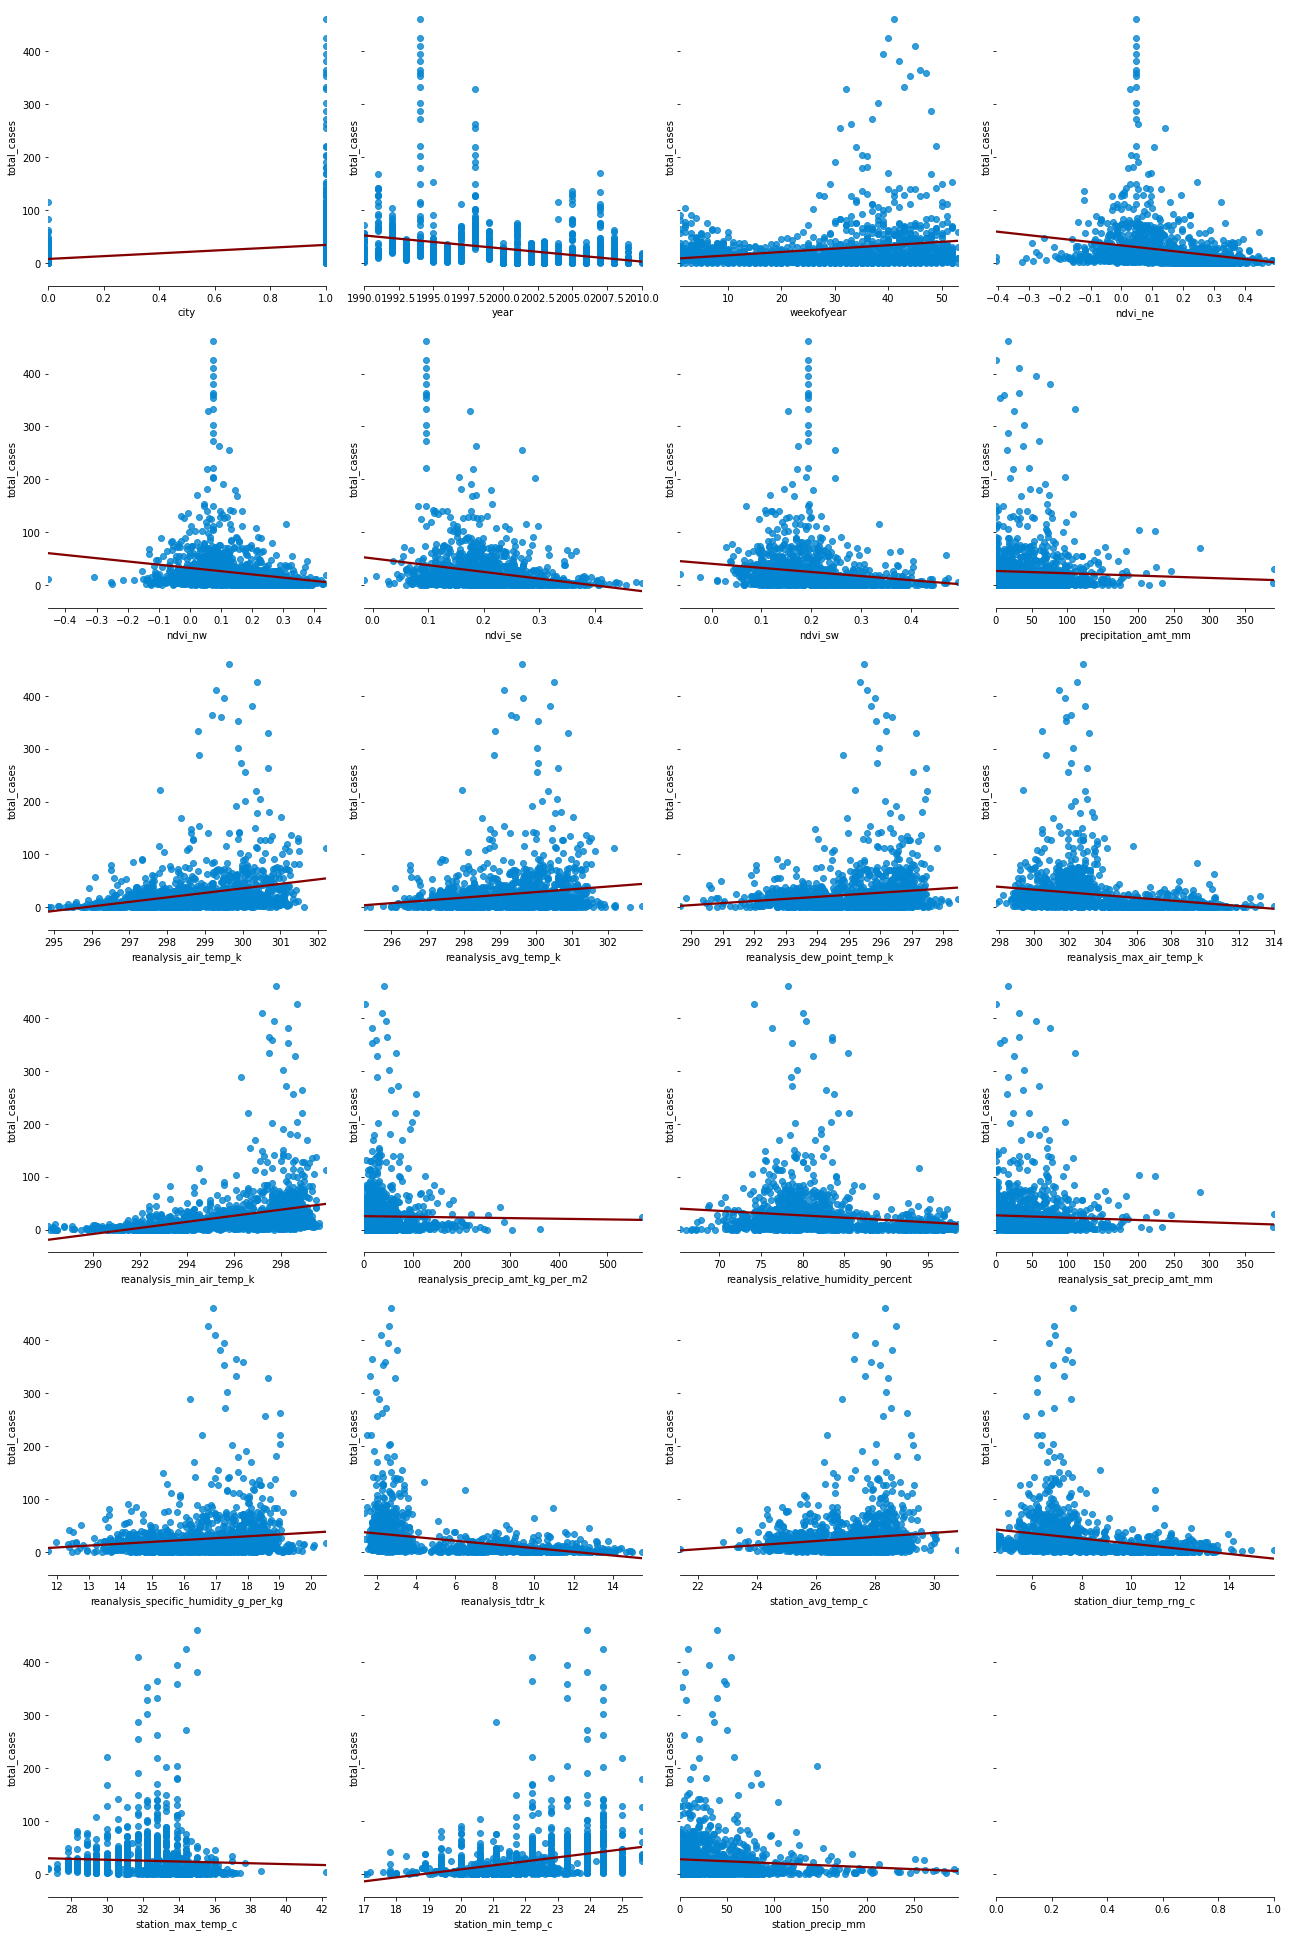

In [35]:
# View linear regression of total cases per attribute

xvlist = list(df.drop(['total_cases'],axis=1)) 

fcol = 4 # limit four graphs per row for easy visualization
frow = int(np.ceil(len(xvlist)/fcol)) # number of rows in your subplot
fhgt = frow*4.5 # height

# Set up the matplotlib figure
f, axes = plt.subplots(frow, fcol, figsize=(18, fhgt), sharey=True) 
sns.despine(left=True)

# make a list of items to iterate over to produce graph
axes_list = [item for sublist in axes for item in sublist]

for k, xvar in enumerate(xvlist):
    
    sns.regplot(
        x=xvar, 
        y='total_cases', 
        data=df, 
        ax=axes_list[k],
        ci = None, # set the confidence interval to none, so no resampling
        logx=False,
        scatter_kws={'color': 'xkcd:cerulean'}, # using xkcd color codes, https://xkcd.com/color/rgb/
        line_kws={'color': '#840000'} # using hex color codes
    )

plt.tight_layout()



In [36]:

# Train Data


In [37]:
#Set X and Y variables
Y=df.total_cases
X=df.iloc[:, :-1]

In [38]:
#Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [39]:
#Scale
scaler=StandardScaler().fit(x_train)
print(scaler.scale_)
print("\n")
print(scaler.mean_)

[ 0.47591597  5.42284013 15.18363844  0.13683864  0.11923098  0.07261706
  0.08197002 43.97413739  1.3505885   1.25183431  1.50150792  3.1736627
  2.46736251 38.73920471  7.03553824 43.97413739  1.51979123  3.4658241
  1.26267291  2.07867185  1.96360501  1.50711766 44.91602668]


[6.53310105e-01 2.00095296e+03 2.63092334e+01 1.28336290e-01
 1.24822602e-01 2.00852745e-01 1.99756125e-01 4.59379878e+01
 2.98711142e+02 2.99225977e+02 2.95274689e+02 3.03334408e+02
 2.95802352e+02 3.87889460e+01 8.22158885e+01 4.59379878e+01
 1.67724017e+01 4.80093330e+00 2.71805687e+01 8.03133379e+00
 3.24062718e+01 2.21417247e+01 3.87328397e+01]


In [ ]:
#Fit models 

In [ ]:
#fit linear regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(scaler.transform(x_train), y_train)

In [ ]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(scaler.transform(x_train), y_train)

In [ ]:
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(scaler.transform(x_train), y_train)

In [ ]:
#fit Multilayer Perceptron (MLP)
percept = MLPRegressor()
percept.fit(scaler.transform(x_train), y_train)

In [ ]:
#fit k-Nearest Neighbour Regression (KNNR)
neighbor = KNeighborsRegressor(n_neighbors=2, n_jobs=-1)
neighbor.fit(scaler.transform(x_train), y_train)

In [ ]:
#Evalaute Models
models= [('Linear Regression', lin_reg), ('Random Forest', forest), ('Decision Tree', tree), ('Perceptron', percept), ('k-NearestNeighbor', neighbor)]

In [ ]:
#RMSE(Root Mean Squared Error)
#Difference between actual and predicted output outputs
#Note: Lower is better
for i, model in models:    
    predictions = model.predict(scaler.transform(x_train))
    MSE = metrics.mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

In [ ]:
#MAE(Mean Absolute Error)
#Average sum of absolute errors
#Note: Lower is better
for i, model in models:
    predictions = model.predict(scaler.transform(x_train))
    MAE = metrics.mean_absolute_error(y_train, predictions)
    msg = "%s= %.2f"% (i, round(MAE, 2))
    print('MAE of', msg)

    

In [ ]:
#R2 (R-Squared Score)
#How much data is explained by the model
#Note: 0 - 1 Higher is better
for i, model in models:
    predictions = model.predict(scaler.transform(x_train))
    R2 = metrics.r2_score(y_train, predictions)
    msg = "%s= %.2f"% (i, round(R2, 2))
    print('R2 of', msg)

In [ ]:
#Selected model: Random Forest
print("Random Forest:")

#Evalaute Model
prediction= forest.predict(scaler.transform(x_train))
 
MSE = metrics.mean_squared_error(y_train, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)

MAE = metrics.mean_absolute_error(y_train, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)

R2 = metrics.r2_score(y_train, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)

In [ ]:
# Fine-tune Random Forest

#n_estimators = n of trees
#max_features = max number of features considered for splitting a node
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split
#min_samples_leaf = min number of data points allowed in a leaf node
#bootstrap = method for sampling data points (with or without replacement)


In [ ]:
#Grid Search

n_estimators = [10, 25]
max_features = [5, 10]
max_depth = [10, 50, None]
bootstrap = [True, False]

param_grid=[{'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth, 'bootstrap': bootstrap}]

grid_search_forest=GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(scaler.transform(x_train), y_train)

In [ ]:
#MTS (Mean test score)
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    MTS = np.sqrt(-mean_score)
    msg = "%s = %.2f"% (params, round(MTS, 2))
    print('MTS of', msg)

In [ ]:
print("Grid Search:")
#find the best model of grid search
grid_best= grid_search_forest.best_estimator_
grid_best_params= grid_search_forest.best_params_
print("best paramaters: ", grid_best_params)


#Evalaute Model
prediction= grid_best.predict(scaler.transform(x_train))
 
MSE = metrics.mean_squared_error(y_train, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)

MAE = metrics.mean_absolute_error(y_train, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)

R2 = metrics.r2_score(y_train, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)

In [ ]:
#Randomized Search

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
print("n_estimators: ",n_estimators)
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
print("max_depth: ",max_depth)
min_samples_split = [5, 10]

param_grid=[{'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth, 'min_samples_split': min_samples_split}]
rand_search_forest=RandomizedSearchCV(estimator = forest, param_distributions = param_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rand_search_forest.fit(scaler.transform(x_train), y_train)

In [ ]:
#MTS (Mean test score)
cvres = rand_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    MTS = np.sqrt(-mean_score)
    msg = "%s = %.2f"% (params, round(MTS, 2))
    print('MTS of', msg)

In [ ]:
print("Rand Search:")
#find the best model of rand search
rand_best= rand_search_forest.best_estimator_
rand_best_params= rand_search_forest.best_params_
print("best paramaters: ", rand_best_params)

#Evalaute Model
prediction= rand_best.predict(scaler.transform(x_train))
 
MSE = metrics.mean_squared_error(y_train, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)

MAE = metrics.mean_absolute_error(y_train, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)

R2 = metrics.r2_score(y_train, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)

In [ ]:
#Test set

print("Random Forest:")
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(scaler.transform(x_test), y_test)
#Evalaute Model
prediction= forest.predict(scaler.transform(x_test))
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)
MAE = metrics.mean_absolute_error(y_test, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)
R2 = metrics.r2_score(y_test, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)

print("\nRandom Forest with best grid parameters:")
#fit random forest with grid
param_grid=[{'bootstrap': [False], 'max_depth': [50], 'max_features': [10], 'n_estimators': [25]}]
grid_search_forest=GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(scaler.transform(x_test), y_test)
#Evalaute Model
prediction= grid_search_forest.predict(scaler.transform(x_test))
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)
MAE = metrics.mean_absolute_error(y_test, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)
R2 = metrics.r2_score(y_test, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)

print("\nRandom Forest with best random parameters:")
#fit random forest with random
param_grid=[{'n_estimators': [155], 'min_samples_split': [10], 'max_features': ['auto'], 'max_depth': [45]}]
rand_search_forest=RandomizedSearchCV(estimator = forest, param_distributions = param_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rand_search_forest.fit(scaler.transform(x_test), y_test)             
#Evalaute Model
prediction= rand_search_forest.predict(scaler.transform(x_test))
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)
MAE = metrics.mean_absolute_error(y_test, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)
R2 = metrics.r2_score(y_test, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)    

In [ ]:

# Feature adjustment


In [ ]:
#view correlation of features
f = plt.figure()
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.show()

In [ ]:
#Feature Importance

features = list(X.columns)

#get feature rating
rand_best_features = rand_best.feature_importances_
grid_best_features = grid_best.feature_importances_

#create tuples
rand_feature_importance= sorted(zip(rand_best_features, features), reverse=True)
grid_feature_importance= sorted(zip(grid_best_features, features), reverse=True)

# #create dataframe
df_grid_feature_importance = pd.DataFrame(grid_feature_importance, columns=['grid_best_features', 'features'])
df_best_features = pd.DataFrame(rand_feature_importance, columns=['rand_importance', 'rand_features'])
df_best_features['grid_importance']=df_grid_feature_importance['grid_best_features']
df_best_features['grid_feature']=df_grid_feature_importance['features']

#View feature importance comparison
df_best_features

In [ ]:
df_top_four = pd.DataFrame(df, columns=['year', 'weekofyear','ndvi_se', 'ndvi_sw', 'total_cases'])
df_top_four

In [ ]:
#view correlation of features
f = plt.figure()
plt.matshow(df_top_four.corr(), fignum=f.number)
plt.xticks(range(df_top_four.shape[1]), df_top_four.columns, fontsize=14, rotation=45)
plt.yticks(range(df_top_four.shape[1]), df_top_four.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.show()

In [ ]:
#Set X and Y variables
tfY=df_top_four.total_cases
tfX=df_top_four.iloc[:, :-1]

In [ ]:
#Split
tfx_train, tfx_test, tfy_train, tfy_test = train_test_split(tfX, tfY, test_size=.20, random_state=42)

In [ ]:
#Scale
tfscaler=StandardScaler().fit(tfx_train)
print(tfscaler.scale_)
print("\n")
print(tfscaler.mean_)

In [ ]:
#fit random forest
tfforest = RandomForestRegressor(n_jobs=-1)
tfforest.fit(tfscaler.transform(tfx_train), tfy_train)

In [ ]:
#Selected model: Random Forest
print("Random Forest:")

#Evalaute Model
prediction= tfforest.predict(tfscaler.transform(tfx_train))
 
MSE = metrics.mean_squared_error(tfy_train, prediction)
RMSE = np.sqrt(MSE)
msg = "%.2f" % (round(RMSE, 2))
print('RMSE =', msg)

MAE = metrics.mean_absolute_error(tfy_train, prediction)
msg = "%.2f"% (round(MAE, 2))
print('MAE =', msg)

R2 = metrics.r2_score(tfy_train, prediction)
msg = "%.2f"% (round(R2, 2))
print('R2 =', msg)